In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\shyam\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Thu Jun  5 05:25:29 2025).


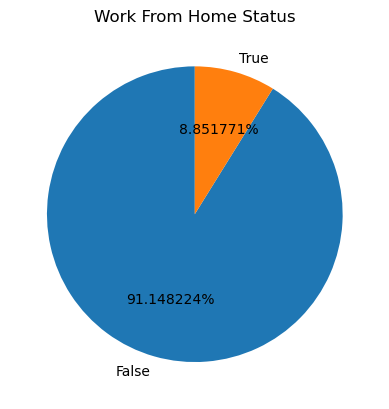

In [2]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90,autopct='%1f%%')
plt.title('Work From Home Status')
plt.ylabel("")
plt.show()

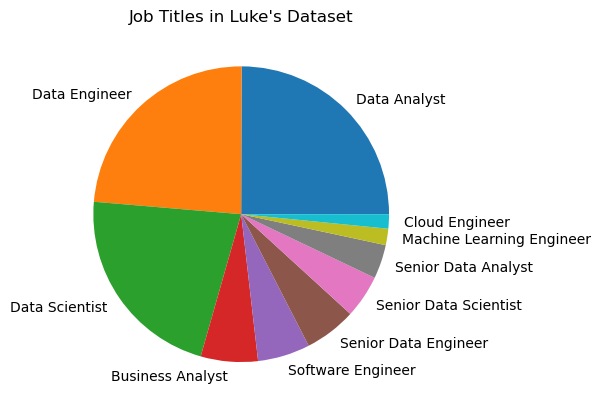

In [3]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title("Job Titles in Luke's Dataset")
plt.ylabel("")
plt.show()

In [4]:
df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


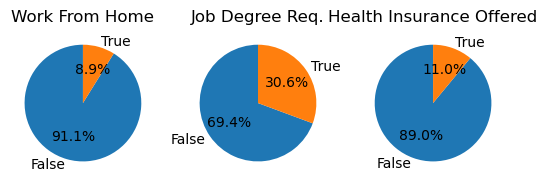

In [5]:
fig,ax=plt.subplots(1,3)

dict_column ={
    'job_work_from_home':'Work From Home',
    'job_no_degree_mention':'Job Degree Req.',
    'job_health_insurance':'Health Insurance Offered'
}

for i,(column,title) in enumerate(dict_column.items()):
    
    ax[i].pie(df[column].value_counts(),startangle=90,autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title)

plt.show()



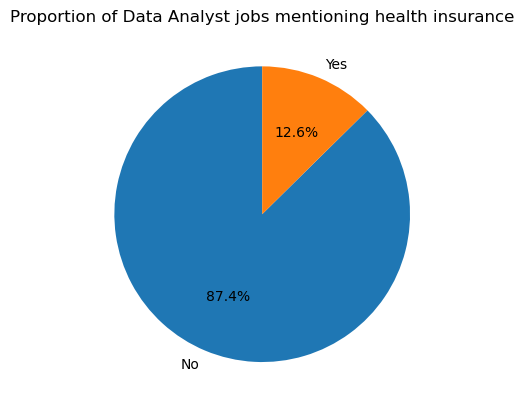

In [6]:
df_DA = df[df['job_title_short']== 'Data Analyst'].copy()
health_insurance_count = df_DA['job_health_insurance'].value_counts()
plt.pie(health_insurance_count,labels=['No','Yes'],autopct='%1.1f%%',startangle=90)
plt.title('Proportion of Data Analyst jobs mentioning health insurance')
plt.show()


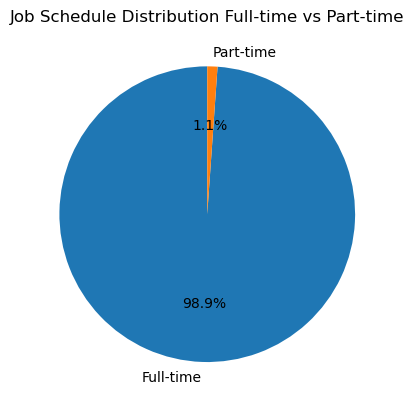

In [8]:
df_ft_pt = df[(df['job_schedule_type']=='Full-time') | (df['job_schedule_type']=='Part-time')].copy()
job_schedule_counts = df_ft_pt['job_schedule_type'].value_counts()
plt.pie(job_schedule_counts,labels=job_schedule_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Job Schedule Distribution Full-time vs Part-time')
plt.show()

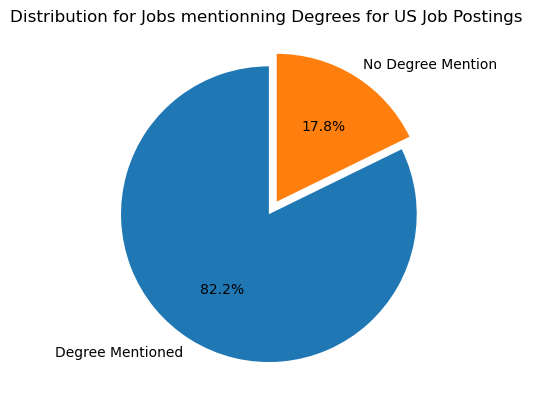

In [9]:
df_US = df[df['job_country']=='United States'].copy()
degree_counts = df_US['job_no_degree_mention'].value_counts()
plt.pie(degree_counts,labels=['Degree Mentioned','No Degree Mention '],autopct='%1.1f%%',startangle=90,explode=(0,0.1))
plt.title('Distribution for Jobs mentionning Degrees for US Job Postings ')
plt.show()